### V03: Model Assessment and Regularization
# Lab3 A3 Model Evaluation and Hyperparameter Tuning

In [1]:
from IPython.display import Image
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd

In this exercise, we will use a classifier called **logistic regression** for the classification of breast cancer based on features of cell nuclei computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe
characteristics of the cell nuclei present in the image.

**Logistic regression**, despite its name, is a linear model for classification rather than regression. Logistic regression is also known in the literature as *logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier.* In this model, the *probabilities* describing the possible outcomes of a single trial are modeled using a logistic function.

As an optimization problem, binary class $\ell_2$ penalized logistic regression minimizes the following cost function $\mathcal{L}$. Note that, in this notation, it’s assumed that the target $y$ takes values in the set $\lbrace -1, 1 \rbrace$.
 

$$ \mathcal{L(w,b)} = \frac{1}{2}w^T w + C \sum_{i=1}^n \log(\exp(- y_i (X_i^T w + b)) + 1) .$$

$C$ is the inverse regularization strength. It must be a positive float. Like in support vector machines (SVC), smaller values specify stronger regularization.


### Loading the Wisconsin breast cancer dataset
Load the Wisconsin breast cancer data set using `load_breast_cancer` from `sklearn.datasets`. Generate a `pandas` dataframe using the feature names (`data.feature_names`) and display the first 10 entries.

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
labels=data.feature_names

df=pd.DataFrame(data=X, columns=labels)

df.head(10)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### (a) Display a histogram of the classes (malign and benign)

Are the classes well balanced?


Text(0, 0.5, 'frequency')

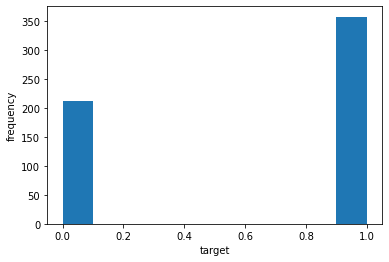

In [4]:
plt.figure()
plt.hist(y)
plt.xlabel('target')
plt.ylabel('frequency')

### (b) Split the data into a training and a test set (20%)
Use 80% of the data for training and the rest for testing.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

### (c) Generate a Pipeline by combining transformers and estimators in a pipeline



Combine a `StandardScaler` as a preprocessing step and a `LogisticRegression` classifier as a learner. Initialize the logistic regression classifier with `random_state=1` and use the `solver='liblinear` option. Determine the estimation accuracy on the training and the test set.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

pipe_lr = make_pipeline(StandardScaler(), 
                        LogisticRegression(random_state=1, solver='liblinear'))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('Train Accuracy: %.3f' % pipe_lr.score(X_train, y_train))
print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))


Train Accuracy: 0.991
Test Accuracy: 0.982


### (d) $k$-fold cross-validation

Use `StratifiedKFold` from `sklearn.model_selection` to generate 10 stratified splits of the training data and determine the model accuracy for each split. Calculate the mean and the standard deviation of the accuracy of all splits.

In [7]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    
kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [153 256], Acc: 0.935
Fold:  2, Class dist.: [153 256], Acc: 0.978
Fold:  3, Class dist.: [153 256], Acc: 0.957
Fold:  4, Class dist.: [153 256], Acc: 0.978
Fold:  5, Class dist.: [153 256], Acc: 0.978
Fold:  6, Class dist.: [153 257], Acc: 1.000
Fold:  7, Class dist.: [153 257], Acc: 1.000
Fold:  8, Class dist.: [153 257], Acc: 0.978
Fold:  9, Class dist.: [153 257], Acc: 0.978
Fold: 10, Class dist.: [153 257], Acc: 0.978

CV accuracy: 0.976 +/- 0.018


### (e) Estimate the model accuracy using `cross_val_score` using a 10-fold cross-validation

In [8]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV accuracy scores: %s' % scores)


CV accuracy scores: [0.93478261 0.97826087 0.95652174 0.97826087 0.97826087 1.
 1.         0.97777778 0.97777778 0.97777778]


In [9]:
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV accuracy: 0.976 +/- 0.018


### (f) Diagnosing bias and variance problems with learning curves

Plot a learning curve using `learning_curve` from `sklearn.model_selection`. Use the $\ell_2$ regularization by setting `penalty ='l2'`as an option. Does the model suffer from a high bias or a high variance problem, or is it just right?

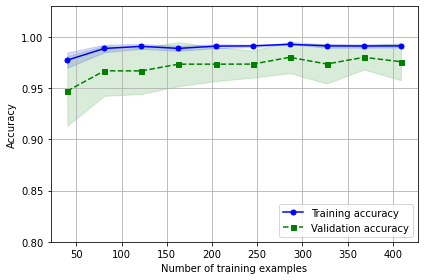

In [10]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve


pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='liblinear', max_iter=10000))

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training examples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
# plt.savefig('images/06_05.png', dpi=300)
plt.show()

<br>
<br>

###  (g) Addressing over- and underfitting with validation curves

Plot a *validation curve* for the inverse of regularization strength $C$ of the logistic regression. Like in support vector machines, smaller values specify stronger regularization. Vary the inverse regularization strength in the following range:
`param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]`. What is the optimum value for $C$?

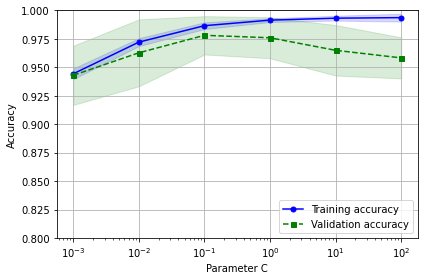

In [11]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='Training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='Validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('images/06_06.png', dpi=300)
plt.show()

### (h) Tuning hyperparameters via grid search 

Use GridSearchCV to tune the inverse regression strength $C$ and to select either $\ell_1$ or $\ell_2$ regularization for the logistic regression classifier. Use logarithmically spaced values for the parameter grid for $C$:

`param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]`

What is the optimum value for the inverse regularization strength? Is it better to use $\ell_1$ or $\ell_2$ regularization? What is the maximum achievable accuracy on the test data?


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(penalty='l2', random_state=1,
                                           solver='liblinear', max_iter=10000))

# To show all tunable parameters of the pipeline, you can use the following command to get the keys.
# pipe_lr.get_params().keys()


In [13]:
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

param_grid = [{'logisticregression__C' : param_range,
               'logisticregression__penalty': ['l1','l2']}]
             

gs = GridSearchCV(estimator=pipe_lr, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  refit=True,
                  cv=10,
                  n_jobs=-1)

gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.9781159420289856
{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}


In [14]:
clf = gs.best_estimator_

# clf.fit(X_train, y_train) 
# note that we do not need to refit the classifier
# because this is done automatically via refit=True.

print('Test accuracy: %.3f' % clf.score(X_test, y_test))

Test accuracy: 0.974


### (i) Plot a a confusion matrix on the test data

Plot a *confusion matrix* using `sklearn.metrics.confusion_matrix` on the test data of the best classifier that was found by the grid search.

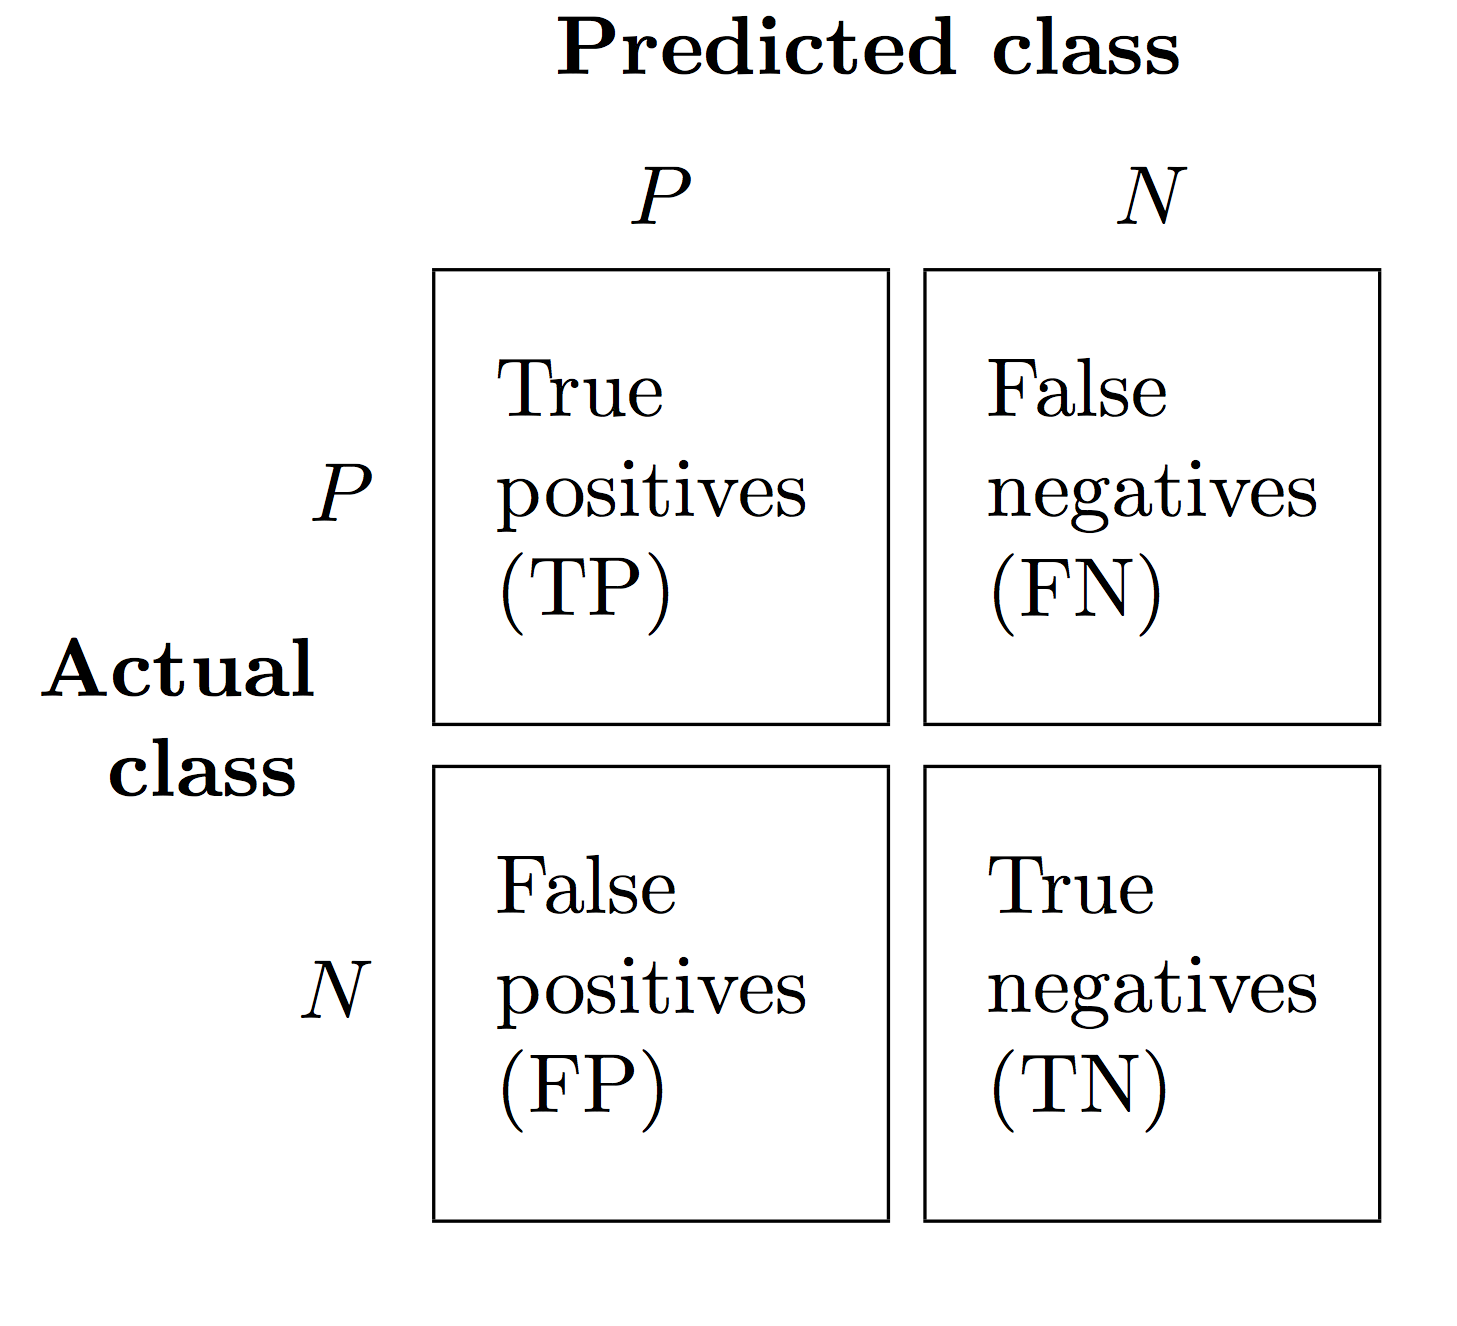

In [17]:
Image(filename='06_08.png', width=300) 

In [18]:
from sklearn.metrics import confusion_matrix

y_pred = clf.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

[[39  3]
 [ 0 72]]


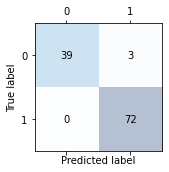

In [19]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

### (k) Calculate precision,  recall and f1-score

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('Recall: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

Precision: 0.960
Recall: 1.000
F1: 0.980
